In [314]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf
import matplotlib.pyplot as plt



In [315]:
start = '2000-01-01'
end = '2023-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [316]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800


In [317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4869 entries, 2004-08-19 to 2023-12-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4869 non-null   float64
 1   High       4869 non-null   float64
 2   Low        4869 non-null   float64
 3   Close      4869 non-null   float64
 4   Adj Close  4869 non-null   float64
 5   Volume     4869 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 266.3 KB


In [318]:
TrainX = data[['Open', 'Close']]
TrainY = data['Close']

In [319]:
#drop date column
TrainX = TrainX.reset_index()
TrainX = TrainX.drop(columns=['Date'])
TrainX


,Open,Close
0,2.490664,2.499133
1,2.515820,2.697639
2,2.758411,2.724787
3,2.770615,2.611960
4,2.614201,2.640104
...,...,...
4864,134.770004,133.199997
4865,132.919998,133.839996
4866,133.860001,137.190002
4867,138.000000,138.100006


In [320]:
TrainX = TrainX[0: int(len(data)*0.80)]
TrainX.shape

(3895, 2)

In [321]:
dfTrainX = pd.DataFrame(TrainX)

In [322]:
dfTrainX

,Open,Close
0,2.490664,2.499133
1,2.515820,2.697639
2,2.758411,2.724787
3,2.770615,2.611960
4,2.614201,2.640104
...,...,...
3890,73.099998,74.296997
3891,72.853500,72.353500
3892,73.121002,72.411499
3893,72.516502,73.811501


In [323]:
TrainY = TrainY.reset_index()
TrainY = TrainY.drop(columns=['Date'])
TrainY


,Close
0,2.499133
1,2.697639
2,2.724787
3,2.611960
4,2.640104
...,...
4864,133.199997
4865,133.839996
4866,137.190002
4867,138.100006


In [324]:
TrainY = TrainY[0: int(len(data)*0.80)]
TrainY.shape

(3895, 1)

In [325]:
scaler_X = MinMaxScaler(feature_range=(0,1))
TrainX = scaler_X.fit_transform(TrainX)

scaler_Y = MinMaxScaler(feature_range=(0,1))
TrainY = scaler_Y.fit_transform(np.array(TrainY).reshape(-1,1))

In [326]:
# scaler = MinMaxScaler(feature_range=(0,1))
# TrainX = scaler.fit_transform(TrainX)
# TrainY = scaler.fit_transform(np.array(TrainY).reshape(-1,1))

In [327]:
TrainX = np.reshape(TrainX, (TrainX.shape[0], 1, 2))


In [328]:
TrainX.shape

(3895, 1, 2)

In [329]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [330]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((TrainX.shape[1],2))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [331]:
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(TrainX.shape[1], 1)))
# model.dropout(0.2)
# model.add(LSTM(units=60), return_sequences=True)
# model.dropout(0.4)
# model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(TrainX, TrainY, epochs=20, batch_size=1, verbose=2)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 1, 50)             10600     
                                                                 
 dropout_20 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_23 (LSTM)              (None, 1, 60)             26640     
                                                                 
 dropout_21 (Dropout)        (None, 1, 60)             0         
                                                                 
 lstm_24 (LSTM)              (None, 1, 80)             45120     
                                                                 
 dropout_22 (Dropout)        (None, 1, 80)             0         
                                                                 
 lstm_25 (LSTM)              (None, 120)              

In [ ]:
TestX = data[['Open', 'Close']]
TestY = data['Close']

In [ ]:
TestX = TestX.reset_index()
TestX = TestX.drop(columns=['Date'])
TestX

,Open,Close
0,2.490664,2.499133
1,2.515820,2.697639
2,2.758411,2.724787
3,2.770615,2.611960
4,2.614201,2.640104
...,...,...
4864,134.770004,133.199997
4865,132.919998,133.839996
4866,133.860001,137.190002
4867,138.000000,138.100006


In [ ]:
TestY = TestY.reset_index()
TestY = TestY.drop(columns=['Date'])
TestY

,Close
0,2.499133
1,2.697639
2,2.724787
3,2.611960
4,2.640104
...,...
4864,133.199997
4865,133.839996
4866,137.190002
4867,138.100006


In [ ]:
TestX = TestX[int(len(data)*0.80):]
TestX.shape

(974, 2)

In [ ]:
TestX = TestX.reset_index()
TestX = TestX.drop(columns=['index'])

TestX

,Open,Close
0,73.716003,75.433998
1,75.590500,75.439499
2,75.723999,75.913498
3,75.634499,75.733002
4,75.779999,76.037003
...,...,...
969,134.770004,133.199997
970,132.919998,133.839996
971,133.860001,137.190002
972,138.000000,138.100006


In [ ]:
dfTestX = pd.DataFrame(TestX)

In [ ]:
dfTestX

,Open,Close
0,73.716003,75.433998
1,75.590500,75.439499
2,75.723999,75.913498
3,75.634499,75.733002
4,75.779999,76.037003
...,...,...
969,134.770004,133.199997
970,132.919998,133.839996
971,133.860001,137.190002
972,138.000000,138.100006


In [ ]:
TestY = TestY[int(len(data)*0.80):]
TestY.shape

(974, 1)

In [ ]:
TestY = TestY.reset_index()
TestY = TestY.drop(columns=['index'])
TestY

,Close
0,75.433998
1,75.439499
2,75.913498
3,75.733002
4,76.037003
...,...
969,133.199997
970,133.839996
971,137.190002
972,138.100006


In [ ]:
TestX_scale = scaler_X.transform(TestX)
TestY_scale = scaler_Y.transform(np.array(TestY).reshape(-1,1))


In [ ]:
TestX_scale = np.reshape(TestX_scale, (TestX_scale.shape[0], 1, 2))

In [ ]:
predicted_price = model.predict(TestX_scale)


31/31 [==============================] - 0s 1ms/step


In [ ]:
predicted_price = scaler_Y.inverse_transform(predicted_price)


In [ ]:
print("Predicted prices:")
print(predicted_price)

Predicted prices:
[[ 71.137024]
 [ 71.89326 ]
 [ 72.13978 ]
 [ 72.030594]
 [ 72.21229 ]
 [ 72.178604]
 [ 72.52072 ]
 [ 72.28688 ]
 [ 71.33146 ]
 [ 68.302216]
 [ 67.73227 ]
 [ 67.04763 ]
 [ 64.65005 ]
 [ 63.2784  ]
 [ 65.99889 ]
 [ 65.97872 ]
 [ 66.10642 ]
 [ 64.41262 ]
 [ 62.35494 ]
 [ 58.957832]
 [ 61.58095 ]
 [ 59.913406]
 [ 54.975163]
 [ 58.48332 ]
 [ 53.635883]
 [ 54.352386]
 [ 53.039097]
 [ 54.251644]
 [ 54.245583]
 [ 52.263153]
 [ 54.925457]
 [ 54.702435]
 [ 55.734352]
 [ 54.86948 ]
 [ 55.688343]
 [ 56.537884]
 [ 54.673393]
 [ 54.488026]
 [ 54.439945]
 [ 56.873188]
 [ 58.654995]
 [ 58.867123]
 [ 59.272106]
 [ 59.085648]
 [ 61.00804 ]
 [ 60.86901 ]
 [ 61.51105 ]
 [ 62.18656 ]
 [ 61.51348 ]
 [ 59.875572]
 [ 60.883945]
 [ 61.741673]
 [ 61.582367]
 [ 62.26544 ]
 [ 61.148586]
 [ 64.721855]
 [ 64.520485]
 [ 63.97409 ]
 [ 63.669647]
 [ 64.859055]
 [ 65.29135 ]
 [ 65.94309 ]
 [ 66.662605]
 [ 66.88532 ]
 [ 66.901054]
 [ 65.66977 ]
 [ 64.90759 ]
 [ 65.61176 ]
 [ 66.10391 ]
 [ 66.418396]
 [

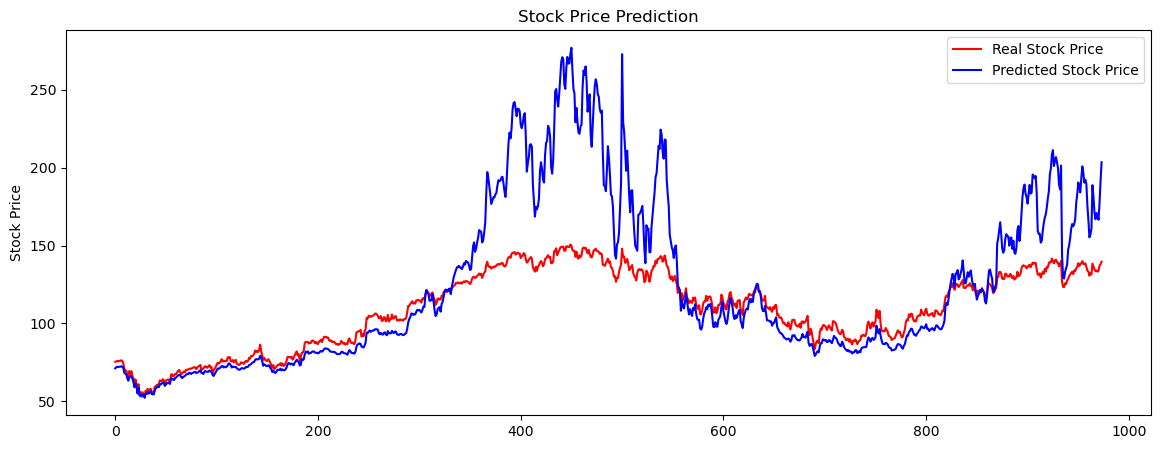

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(TestY, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

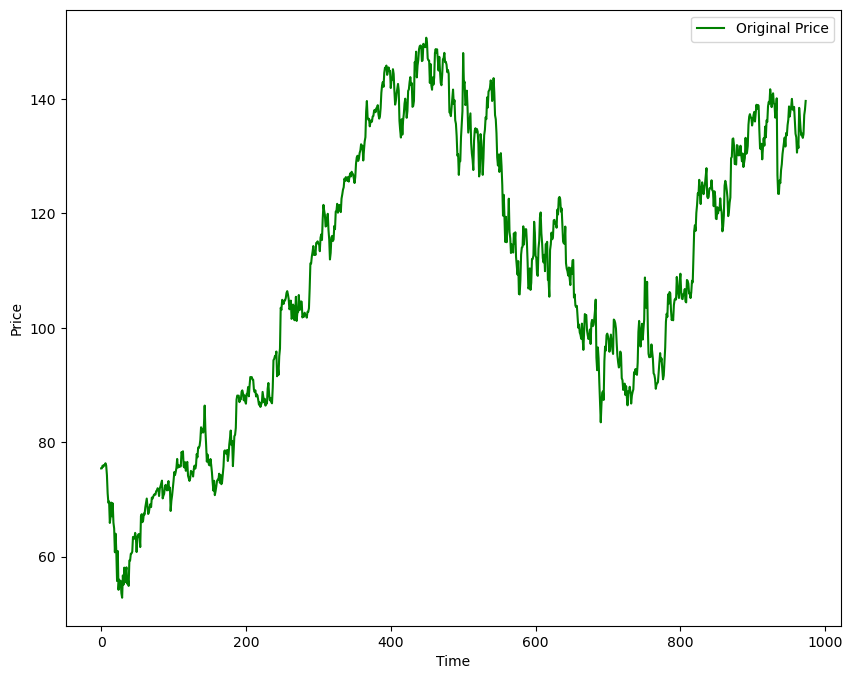

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(TestY, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

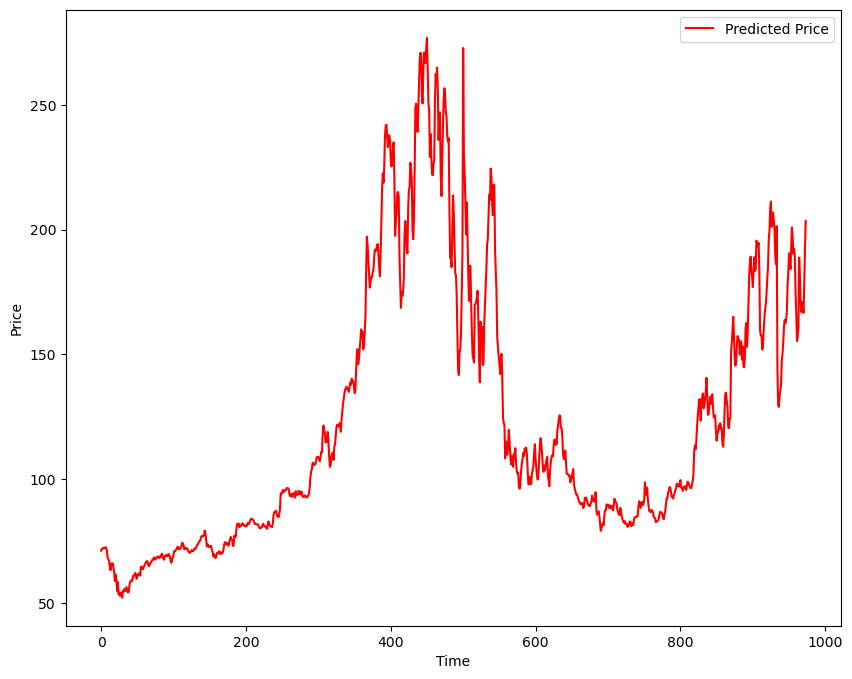

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(predicted_price, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('MULTI Stock Predictions Model 20.keras')

In [ ]:
from sklearn.metrics import mean_squared_error
def model_evaluate(): 
    errors = mean_squared_error(TestY, predicted_price)

    print("MSE ", errors)

In [ ]:
model_evaluate()

MSE  1220.1537211712969


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
dfTestX.shape

(974, 2)

In [ ]:
# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(dfTestX.values, feature_names=dfTestX.columns.values.tolist(),
                                                  class_names=['Close'], verbose=True, mode='regression')

In [ ]:
# j = 5
# exp = explainer.explain_instance(dfTestX.values[j], model.predict, num_features=2)

In [ ]:
dfTestX.values[5].shape

(2,)